In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer as DV

from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import MultinomialNB

## Step 5: Data cleaning

Some points to keep in mind: 

- [ ] Find missing values. 
- [ ] Find NaN and 0 values. 
- [ ] Do all columns have the same dtypes?
- [ ] Convert dates to datetime types.
    - [ ] You can use the python package arrow or datetime.
- [ ] Convert categorical variables to type 'category' if working with pandas. 
- [ ] Convert strings to ints or floats if they represent numbers.
- [ ] Standardize strings
    - [ ] Convert them to lower case if possible.
    - [ ] Replace spaces with underscores or dashes.
    - [ ] Remove white spaces around the string **this is very critical**.
    - [ ] Check of inconsistent spellings *typically done manually*.
- [ ] Look for duplicate rows or columns.
- [ ] Look for preprocessed columns; example: A categorical column that has been duplicated 
    with categorical labels.
    
A list of data cleaning libraries: https://mode.com/blog/python-data-cleaning-libraries/ 

In [2]:
df = pd.read_csv("../../data/external/dataset.csv")
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

### Dropping Columns
- CLIENTNUM is a unique identifier for each row and will not be used
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 & Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2 are classifier columns derived either from the bank's internal team or from the original poster of the dataset

In [3]:
df = df.drop(["CLIENTNUM", 
              "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", 
              "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
             ], axis=1)

In [ ]:
df.info()

### Null Values
There are no null values in entire dataframe

In [4]:
df.isnull().sum(axis=0)

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [7]:
df.shape

(10127, 20)

Rows: 10,127
Columns: 20
    - Character: 6
    - Numeric: 14
 

In [26]:
df.replace(['Existing Customer','Attrited Customer'],[1,0],inplace=True)
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0               1            45      M                3     High School   
1               1            49      F                5        Graduate   
2               1            51      M                3        Graduate   
3               1            40      F                4     High School   
4               1            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [27]:
# One hot encoding for categorical variables - convert categorical to numeric
df_cc_encoded = pd.get_dummies(df)
df_cc_encoded.head()

Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
0               1            45                3              39   
1               1            49                5              44   
2               1            51                3              36   
3               1            40                4              34   
4               1            40                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  ...  \
0       12691.0                  777          11914.0  ...   
1        8256.0                  864           7392.0  ...   
2        3418.0                    0           3418.0  ...   
3        3313.0                 2517            796.0  ...   
4        4716.0                    0           4716.0  ...   

   Income_Category_$120K +  Income_Category_$40K - $60K  \
0                        0                            0   
1                        0                            0   
2                        0                            0   
3                        0                            0   
4                        0                            0   

   Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
0                            1                             0   
1                            0                             0   
2                            0                             1   
3                            0                             0   
4                            1                             0   

   Income_Category_Less than $40K  Income_Category_Unknown  \
0                               0                        0   
1                               1                        0   
2                               0                        0   
3                               1                        0   
4                               0                        0   

   Card_Category_Blue  Card_Category_Gold  Card_Category_Platinum  \
0                   1                   0                       0   
1                   1                   0                       0   
2                   1                   0                       0   
3                   1                   0                       0   
4                   1                   0                       0   

   Card_Category_Silver  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 38 columns]

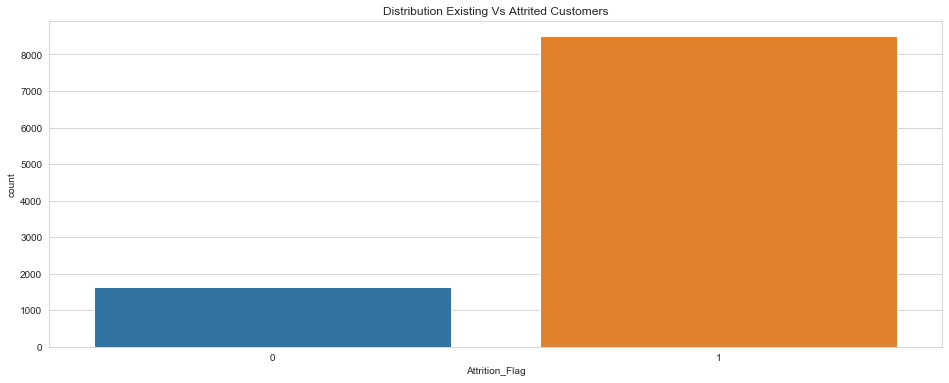

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 6))
plt.title("Distribution Existing Vs Attrited Customers")
sns.countplot(x=df['Attrition_Flag'])

- dataset is imbalanced
- how do we show percentages here?

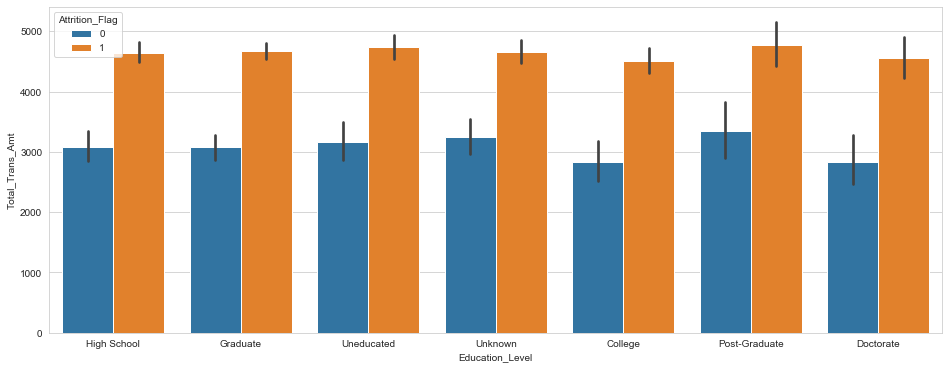

In [11]:
plt.figure(figsize=(16, 6))
sns.barplot(x="Education_Level", y="Total_Trans_Amt", hue='Attrition_Flag', data=df)

Education Level did not affect Transaction amount and Attrition.

In [12]:
# fig=go.Figure()
# fig.add_trace(go.Histogram(x=df.loc[df['Attrition_Flag']=='Existing Customer']['Education_Level'],
#                            histnorm='probability density',marker=dict(color='crimson'),
#                            opacity=0.75,name='Education level of existing customers'))
# fig.add_trace(go.Histogram(x=df.loc[df['Attrition_Flag']=='Attrited Customer']['Education_Level'],
#                            histnorm='probability density',marker=dict(color='dodgerblue'),
#                            opacity=0.75,name='Education level of churned customers'))
# fig.update_layout(title='Education level',legend=dict(x=0.5,xanchor='center',orientation='h'),margin=dict(l=0,r=0,t=30,b=0))
# fig.show()

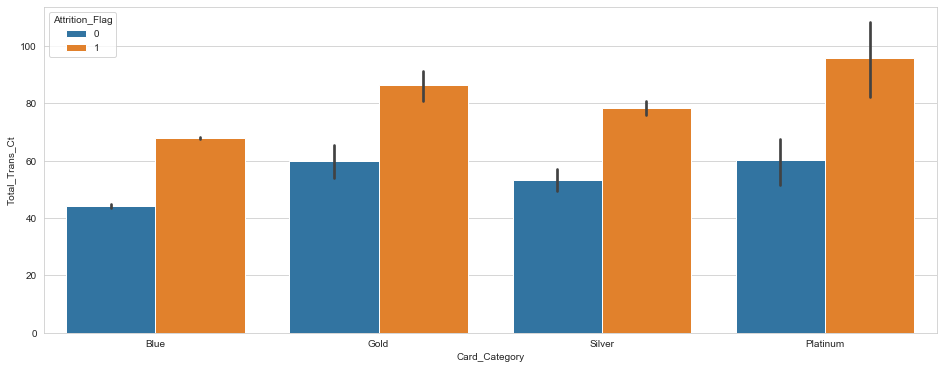

In [13]:
# sns.set(rc={'figure.figsize':(15,7)})
plt.figure(figsize=(16, 6))
sns.barplot(x="Card_Category", y="Total_Trans_Ct", hue='Attrition_Flag', data=df)

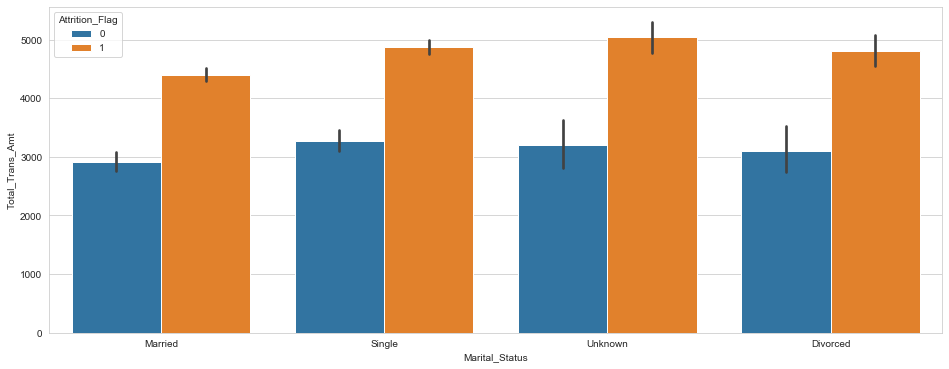

In [14]:
plt.figure(figsize=(16, 6))
sns.barplot(x="Marital_Status", y="Total_Trans_Amt", hue='Attrition_Flag', data=df)

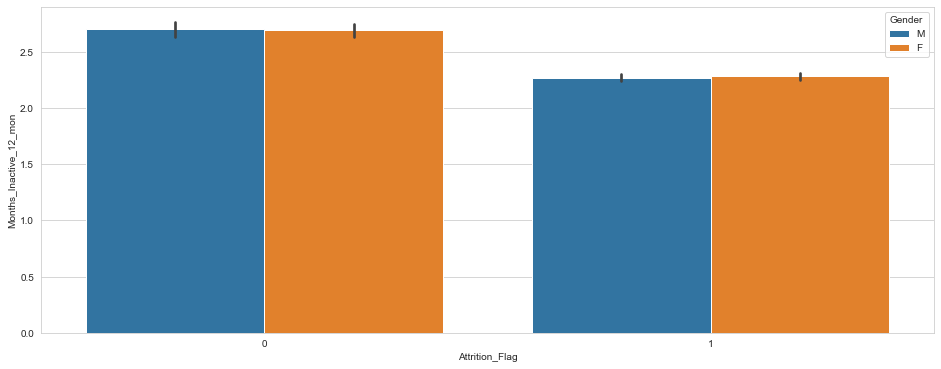

In [15]:
plt.figure(figsize=(16, 6))
sns.barplot(x="Attrition_Flag", y="Months_Inactive_12_mon", hue='Gender', data=df)

In [16]:
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0               1            45      M                3     High School   
1               1            49      F                5        Graduate   
2               1            51      M                3        Graduate   
3               1            40      F                4     High School   
4               1            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

# Pairplots

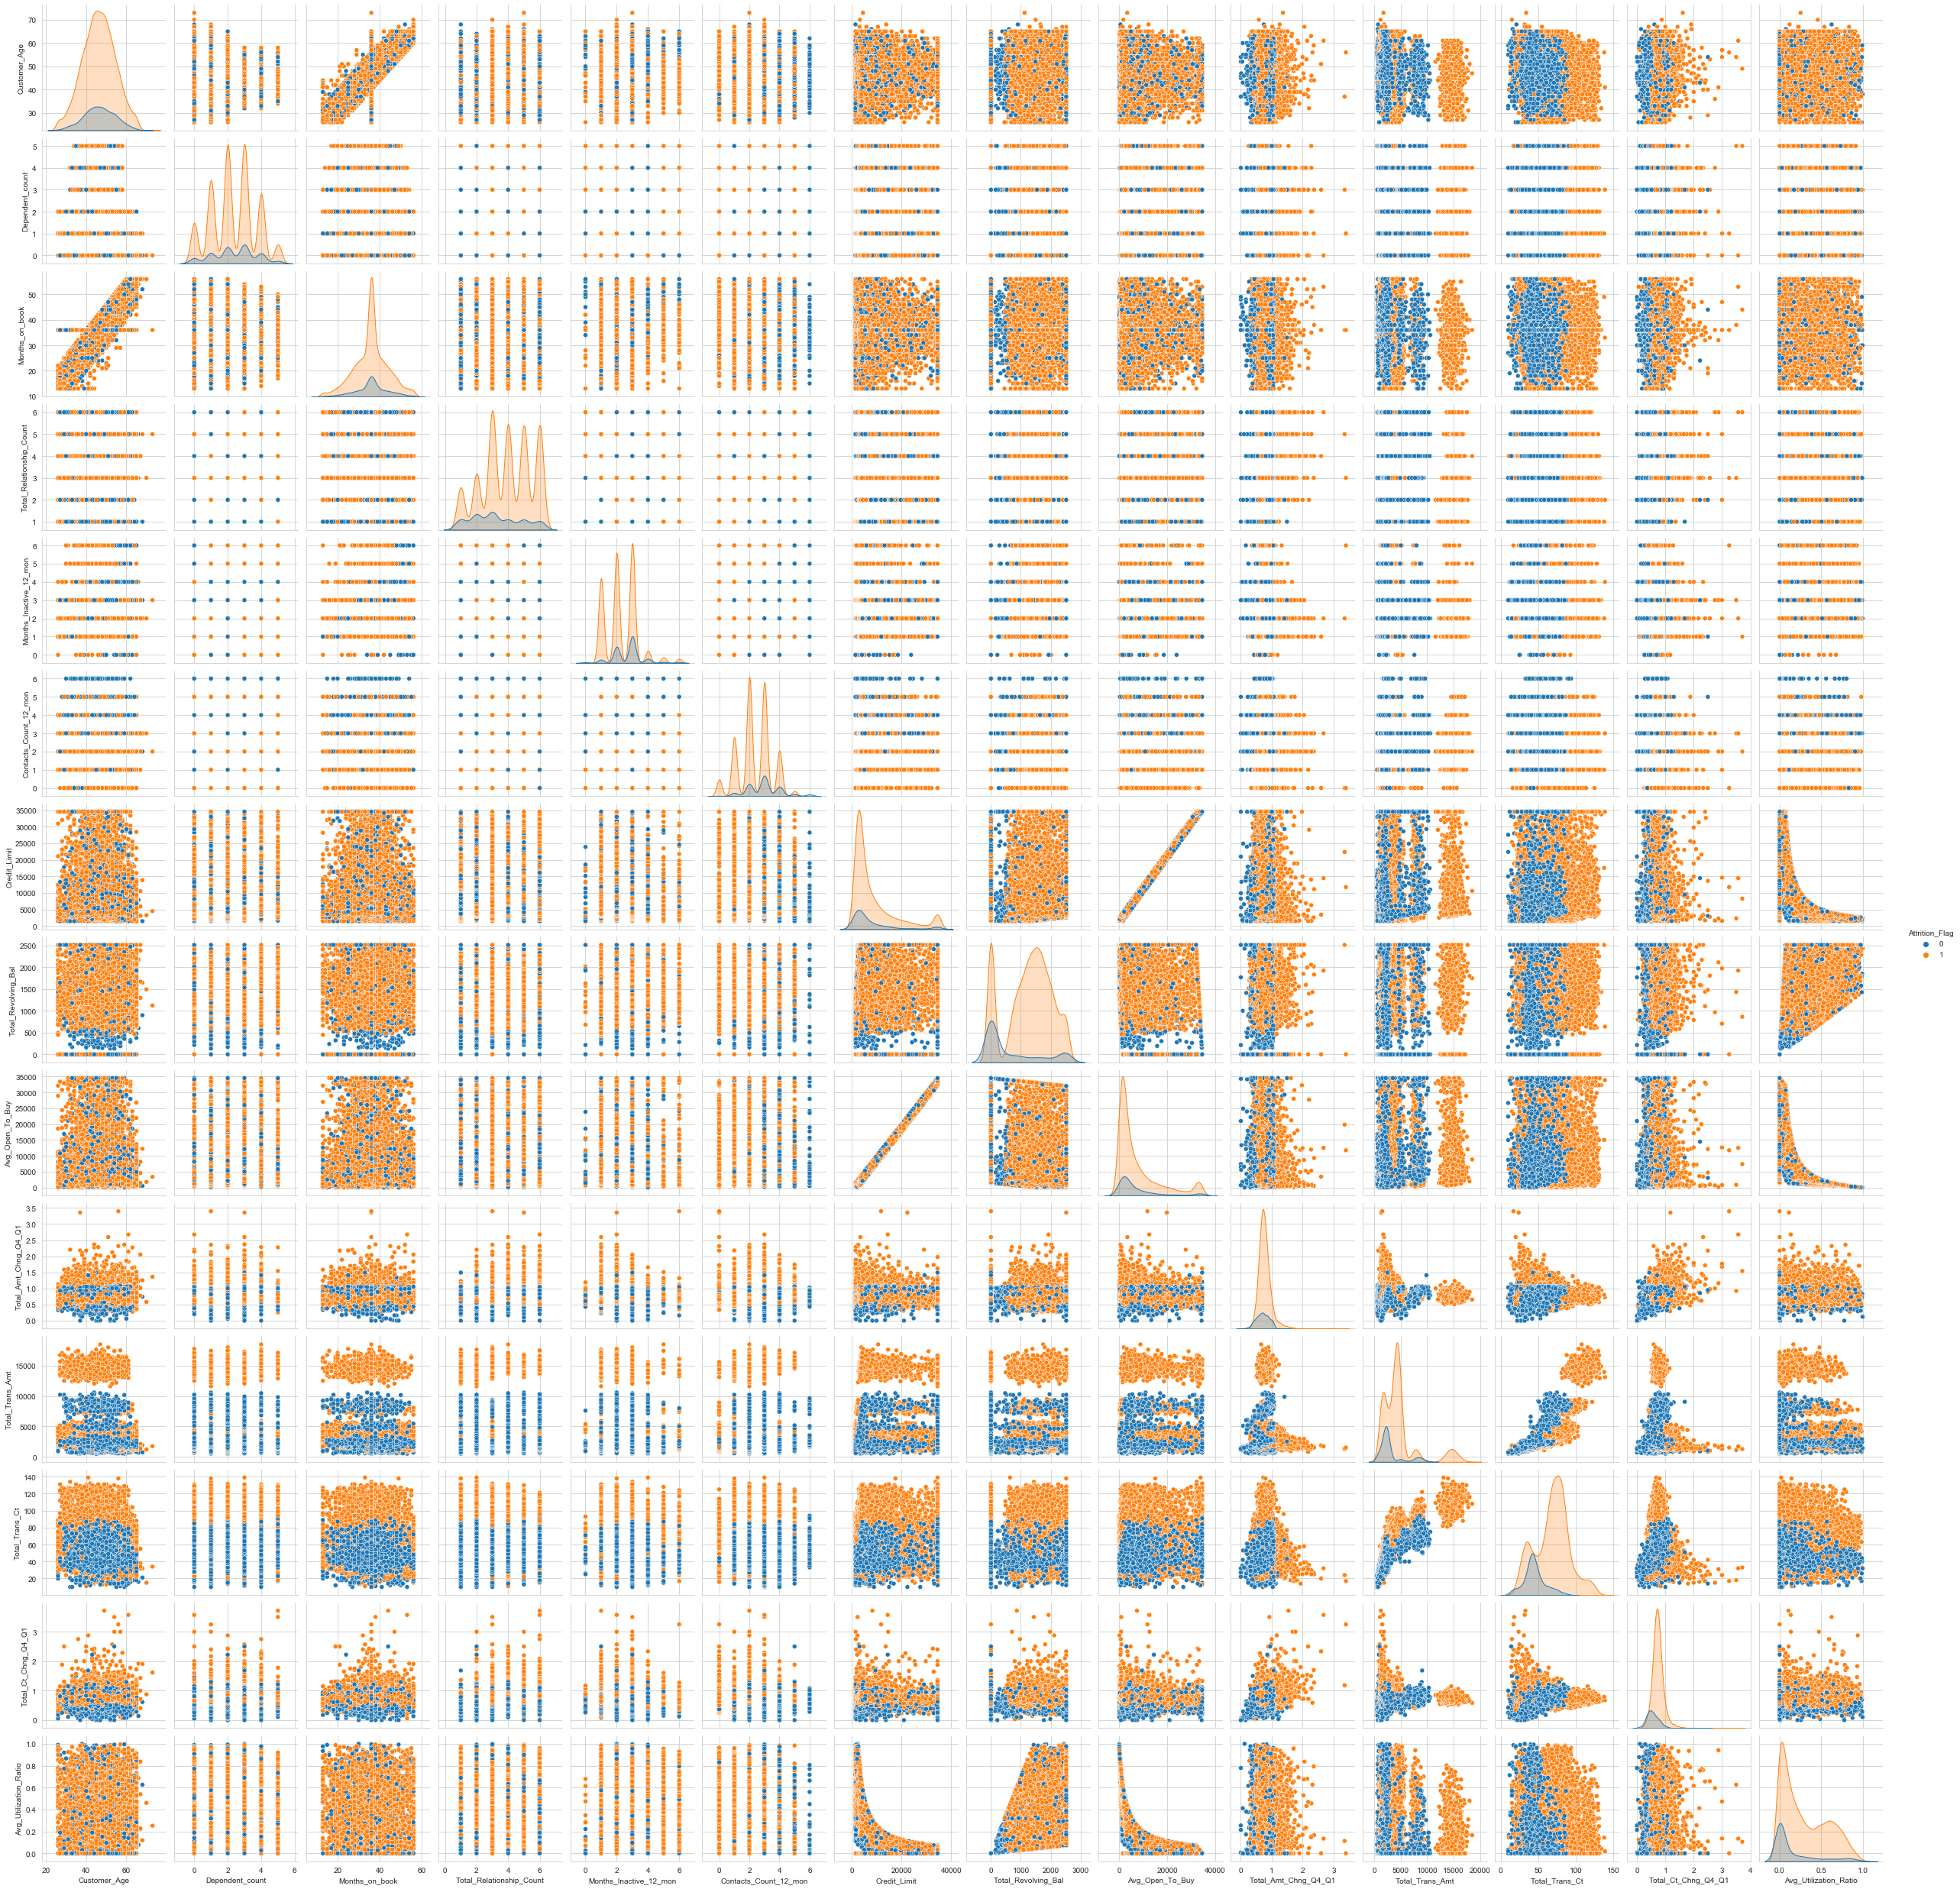

In [17]:
sns.pairplot(df, hue = 'Attrition_Flag')

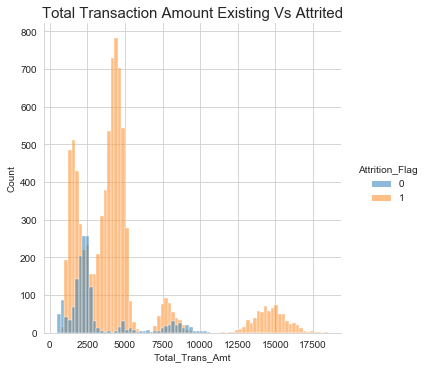

In [29]:
sns.displot(data=df, x='Total_Trans_Amt', hue='Attrition_Flag')
plt.title('Total Transaction Amount Existing Vs Attrited',fontsize=15);

Total transaction amt for attrited customers peaked at 2500 vs existing at 5000.

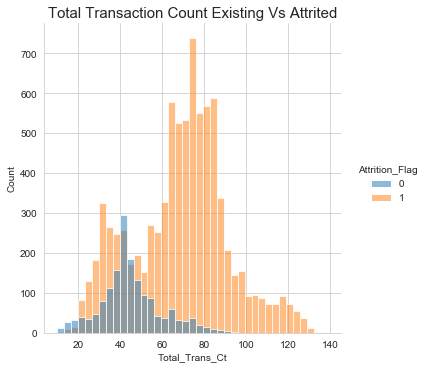

In [30]:
sns.displot(data=df, x='Total_Trans_Ct', hue='Attrition_Flag')
plt.title('Total Transaction Count Existing Vs Attrited',fontsize=15);

Total transaction count for attrited customers peaked at around 40 transactions, existing customers transaction ct is double that peaking at 80 transactions.

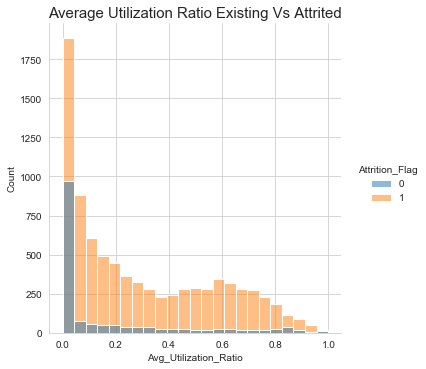

In [21]:
sns.displot(data=df, x='Avg_Utilization_Ratio', hue='Attrition_Flag')
plt.title('Average Utilization Ratio Existing Vs Attrited',fontsize=15);

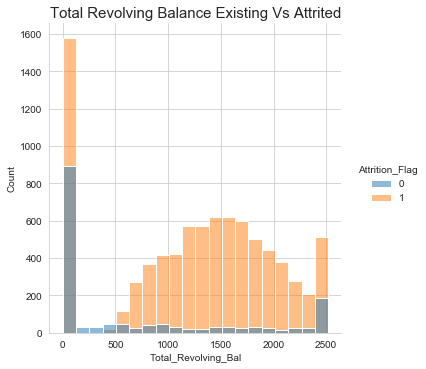

In [22]:
sns.displot(data=df, x='Total_Revolving_Bal', hue='Attrition_Flag')
plt.title('Total Revolving Balance Existing Vs Attrited',fontsize=15);

Majority of attrited customers do not utilize their credit cards, as seen above in both plots.

# Outliers

In [23]:
df.describe()

Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
count    10127.000000  10127.000000     10127.000000    10127.000000   
mean         0.839340     46.325960         2.346203       35.928409   
std          0.367235      8.016814         1.298908        7.986416   
min          0.000000     26.000000         0.000000       13.000000   
25%          1.000000     41.000000         1.000000       31.000000   
50%          1.000000     46.000000         2.000000       36.000000   
75%          1.000000     52.000000         3.000000       40.000000   
max          1.000000     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

Describe results above show that most columns have acceptable anomaly range, and there is no erroneous data captured such unnaturally high customer age. If you compare mean and median (50%) values, the larger the values the more likelihood of outliers in those features. For example, credit limit mean is \\$8631.95 while the median is $4549. This could indicate there are outliers due to wide discrepancy.
Avg_Open_To_Buy - could be the amount of credit available to use at a given time & Avg_Utilization_Ratio. This also has a wide discrepancy but that may be normal. We will plot to confirm.

### Interquartile Range (IQR) is a measure of statistical dispersion

IQR is the 1st quartile subtracted from the 3rd quartile.

In [24]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Attrition_Flag                 0.000
Customer_Age                  11.000
Dependent_count                2.000
Months_on_book                 9.000
Total_Relationship_Count       2.000
Months_Inactive_12_mon         1.000
Contacts_Count_12_mon          1.000
Credit_Limit                8512.500
Total_Revolving_Bal         1425.000
Avg_Open_To_Buy             8534.500
Total_Amt_Chng_Q4_Q1           0.228
Total_Trans_Amt             2585.500
Total_Trans_Ct                36.000
Total_Ct_Chng_Q4_Q1            0.236
Avg_Utilization_Ratio          0.480
dtype: float64


In [ ]:
# print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

The output above shows true / false values for all datapoints, where false means the value is valid but true indicates presence of an outlier.

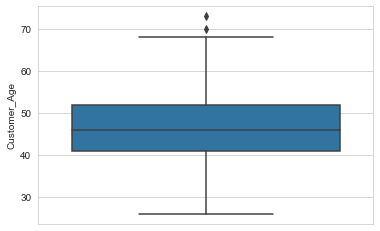

In [32]:
sns.boxplot(y='Customer_Age', hue='Attrition_Flag', data=df)

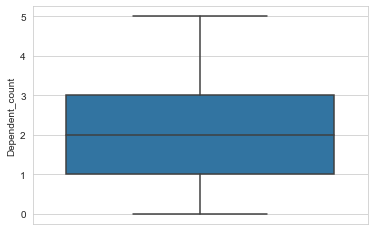

In [33]:
sns.boxplot(y='Dependent_count', hue='Attrition_Flag', data=df)

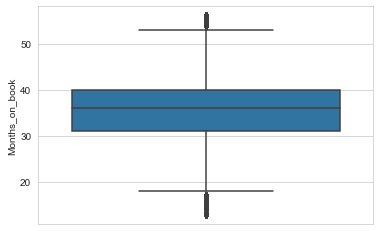

In [34]:
sns.boxplot(y='Months_on_book', hue='Attrition_Flag', data=df)

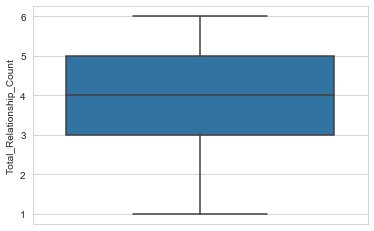

In [35]:
sns.boxplot(y='Total_Relationship_Count', hue='Attrition_Flag', data=df)

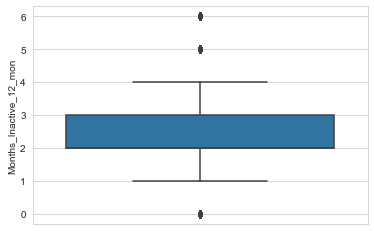

In [36]:
sns.boxplot(y='Months_Inactive_12_mon', hue='Attrition_Flag', data=df)

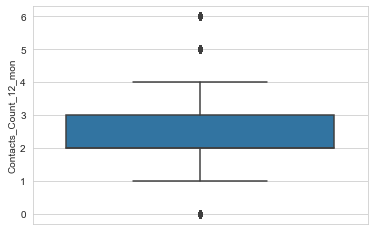

In [37]:
sns.boxplot(y='Contacts_Count_12_mon', hue='Attrition_Flag', data=df)

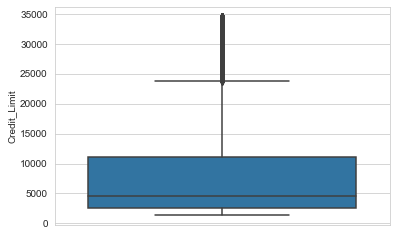

In [38]:
sns.boxplot(y='Credit_Limit', hue='Attrition_Flag', data=df)

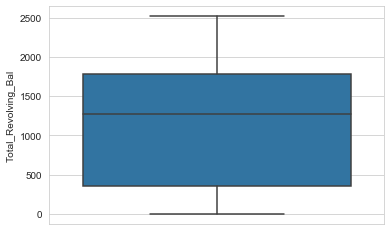

In [39]:
sns.boxplot(y='Total_Revolving_Bal', hue='Attrition_Flag', data=df)

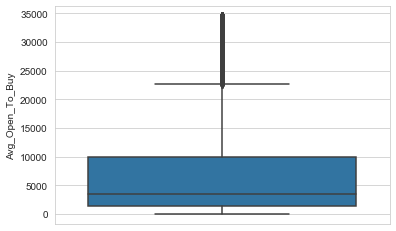

In [40]:
sns.boxplot(y='Avg_Open_To_Buy', hue='Attrition_Flag', data=df)

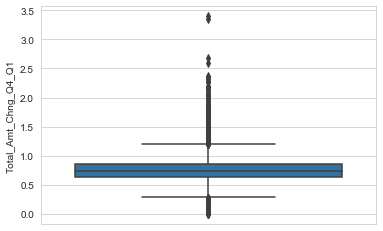

In [41]:
sns.boxplot(y='Total_Amt_Chng_Q4_Q1', hue='Attrition_Flag', data=df)

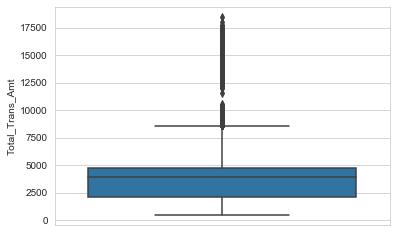

In [42]:
sns.boxplot(y='Total_Trans_Amt', hue='Attrition_Flag', data=df)

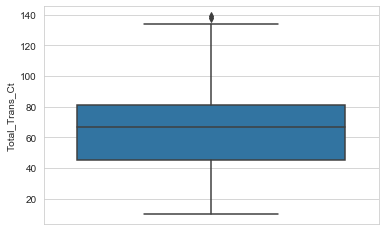

In [43]:
sns.boxplot(y='Total_Trans_Ct', hue='Attrition_Flag', data=df)

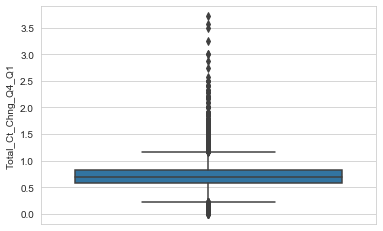

In [44]:
sns.boxplot(y='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag', data=df)

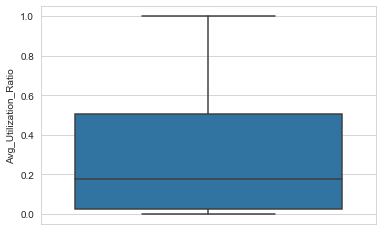

In [45]:
sns.boxplot(y='Avg_Utilization_Ratio', hue='Attrition_Flag', data=df)

### Correcting and Removing Outliers

In [46]:
df_without_outliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_without_outliers

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
10                 1            42      M                5      Uneducated   
14                 1            57      F                2        Graduate   
19                 1            45      F                2        Graduate   
23                 1            47      F                4         Unknown   
24                 1            54      M                2         Unknown   
...              ...           ...    ...              ...             ...   
9117               1            49      F                3        Graduate   
9122               1            45      M                2     High School   
9130               1            47      F                4   Post-Graduate   
9133               1            46      F                4      Uneducated   
9139               1            55      M                4         Unknown   

     Marital_Status Income_Category Card_Category  Months_on_book  \
10          Unknown         $120K +          Blue              31   
14          Married  Less than $40K          Blue              48   
19          Married         Unknown          Blue              37   
23           Single  Less than $40K          Blue              36   
24          Married    $80K - $120K          Blue              42   
...             ...             ...           ...             ...   
9117         Single     $40K - $60K        Silver              36   
9122        Married     $40K - $60K          Blue              33   
9130         Single  Less than $40K          Blue              27   
9133       Divorced         Unknown          Blue              34   
9139         Single     $60K - $80K          Blue              48   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
10                           5                       3                      2   
14                           5                       2                      2   
19                           6                       1                      2   
23                           3                       3                      2   
24                           4                       2                      3   
...                        ...                     ...                    ...   
9117                         1                       3                      1   
9122                         1                       3                      3   
9130                         1                       2                      2   
9133                         2                       3                      1   
9139                         2                       2                      3   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
10          6748.0                 1467           5281.0   
14          2436.0                  680           1756.0   
19         14470.0                 1157          13313.0   
23          2492.0                 1560            932.0   
24         12217.0                    0          12217.0   
...            ...                  ...              ...   
9117       20176.0                 2219          17957.0   
9122       11529.0                 1823           9706.0   
9130        8837.0                 2517           6320.0   
9133        8110.0                 1549           6561.0   
9139       18980.0                 2517          16463.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10                   0.831             1201              42   
14                   1.190             1570              29   
19                   0.966             1207              21   
23                   0.573             1126              23   
24                   1.075             1110              21   
...                    ...              ...             ...   
9117                 0.693             8255              86   
9122                 0.727             813

In [ ]:
print(df.shape)
print(df_without_outliers.shape)

## Imbalance in the Target Variable

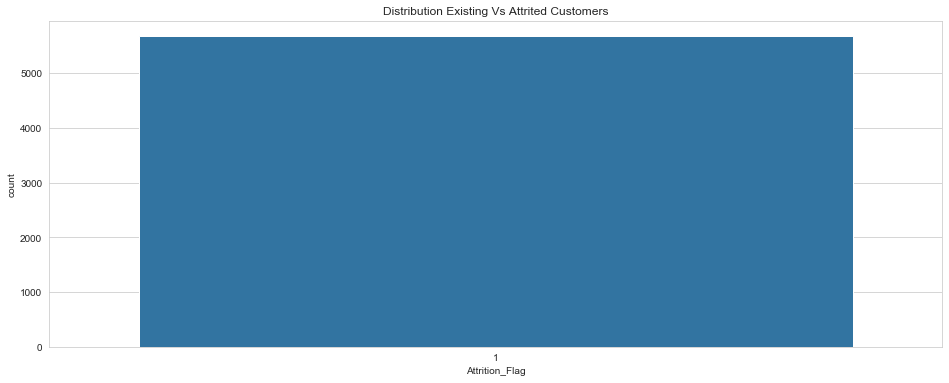

In [47]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 6))
plt.title("Distribution Existing Vs Attrited Customers")
sns.countplot(x=df_without_outliers['Attrition_Flag'])

Existing customers account for 83% (8500 records) of the data, while 17% (1627 records) is attrited customers. If we use this data ratio to train our model then the model will be biased towards existing customers.
To deal with this we will use an over sampling technique called SMOTE. Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way. The new instances are not just copies of existing rows, the algorithm takes samples of the feature space for each target class and its nearest neighbors. The algorithm then generates new examples that combine features of the target case with features of its neighbors. This approach increases the features available to each class and makes the samples more general.
SMOTE is not guaranteed to produce more accurate models. We will try pipelining with different percentages, different feature sets, and different numbers of nearest neighbors to see how adding cases influences our model.

In [48]:
# Divide our dataset into feature and target set
x = df_cc_encoded.drop('Attrition_Flag',axis=1) # Feature set
x.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
3            40                4              34                         3   
4            40                3              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  \
0                  777          11914.0                 1.335  ...   
1                  864           7392.0                 1.541  ...   
2                    0           3418.0                 2.594  ...   
3                 2517            796.0                 1.405  ...   
4                    0           4716.0                 2.175  ...   

   Income_Category_$120K +  Income_Category_$40K - $60K  \
0                        0                            0   
1                        0                            0   
2                        0                            0   
3                        0                            0   
4                        0                            0   

   Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
0                            1                             0   
1                            0                             0   
2                            0                             1   
3                            0                             0   
4                            1                             0   

   Income_Category_Less than $40K  Income_Category_Unknown  \
0                               0                        0   
1                               1                        0   
2                               0                        0   
3                               1                        0   
4                               0                        0   

   Card_Category_Blue  Card_Category_Gold  Card_Category_Platinum  \
0                   1                   0                       0   
1                   1                   0                       0   
2                   1                   0                       0   
3                   1                   0                       0   
4                   1                   0                       0   

   Card_Category_Silver  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 37 columns]

In [ ]:
#getting dummy variables for object type data
# obj_list=x.select_dtypes(include='object')
# float_list=x.select_dtypes(exclude='object')
# obj_list=pd.get_dummies(obj_list)
# x=pd.concat([obj_list,float_list],axis=1)

In [67]:
y = df_cc_encoded['Attrition_Flag']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Attrition_Flag, dtype: int64

In [51]:
smote = SMOTE(random_state=60)
x_smote, y_smote = smote.fit_resample(x,y)

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


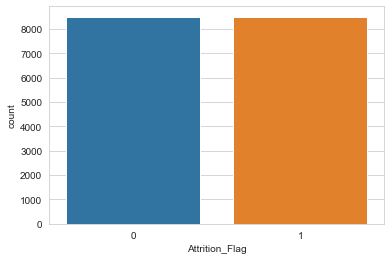

In [52]:
sns.countplot(y_smote)

After oversampling with SMOTE, the data is now balanced and we can proceed to training the model.

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## Logistic Regression

In [59]:
logistic = LogisticRegression(solver='lbfgs', max_iter=1000)
logistic.fit(x_train, y_train)
prediction_lr = logistic.predict(x_test)
print(classification_report(y_test,prediction_lr))

              precision    recall  f1-score   support

           0       0.72      0.49      0.58       384
           1       0.91      0.97      0.94      2148

    accuracy                           0.89      2532
   macro avg       0.82      0.73      0.76      2532
weighted avg       0.88      0.89      0.88      2532



## Naive Bayes

In [60]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
# nbmodel = MultinomialNB().fit(x_train, y_train)
# nbpredictions=nbmodel.predict(x_train)

# print(classification_report(y_test, nbpredictions))

ValueError: Found input variables with inconsistent numbers of samples: [2532, 7595]

## Feature Importance

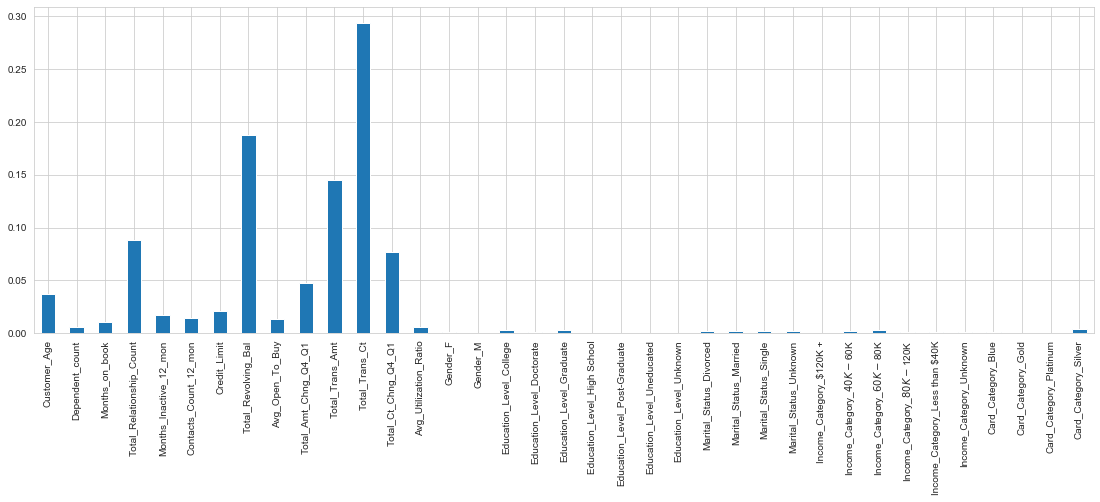

In [74]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x, y)

pd.Series(clf.feature_importances_, index=x.columns[:]).plot.bar(figsize=(19, 6))

In [64]:
import sklearn
print(sklearn.__version__)
print(x.shape, y.shape)

0.24.1
(10127, 37) (10127,)


In [65]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# get importance
importance = logistic.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

TypeError: only size-1 arrays can be converted to Python scalars